In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

import gwosc
from gwosc import datasets
from gwosc.datasets import event_gps, run_segment
from gwosc.locate import get_event_urls

import gwpy
from gwpy.timeseries import TimeSeries

In [ ]:
O1_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O1'))
O2_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O2_4KHZ_R1'))
events = O1_events + O2_events
print(events)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


In [ ]:
len(events) + len(datasets.find_datasets(type='events', catalog='GWTC-2.1-confident', segment=run_segment('O3a_16KHZ_R1'))) \
+ len(datasets.find_datasets(type='events', catalog='GWTC-3-confident', segment=run_segment('O3b_16KHZ_R1')))

90

In [ ]:
seg_int = 32
detectors = ['H1', 'L1']
time_windows = [0.5, 1.0, 2.0, 4.0]

for event in tqdm(events):
    gps = event_gps(event)
    segment = (np.ceil(gps)-seg_int/2, np.ceil(gps)+seg_int/2)
    for detector in detectors:
        data = TimeSeries.fetch_open_data(detector, *segment, sample_rate=4096, verbose=True)
        for time_window in time_windows:
            hq = data.q_transform(frange=(10, 2048), outseg=(gps-time_window/2,gps+time_window/2))
            plot = hq.plot(figsize=(14, 17), dpi=20, vmin=0, vmax=25.5)
            plt.yscale('log', base=2)
            ax = plt.gca()
            ax.axis('off')
            plt.tight_layout()
            plt.subplots_adjust(bottom=0.,left=0.,right=1.,top=1.001)
            #plt.savefig(f"./datasets/Real_GWs_BW/{event.split('-')[0]}_{detector}_{time_window}.png", dpi=10)
            plt.close()

In [ ]:
event = 'GW150914-v3'
gps = event_gps(event)

In [ ]:
seg_int = 10
segment = (int(gps)-seg_int/2, int(gps)+seg_int/2)
data = TimeSeries.fetch_open_data('L1', *segment, sample_rate=16384, cache=True)

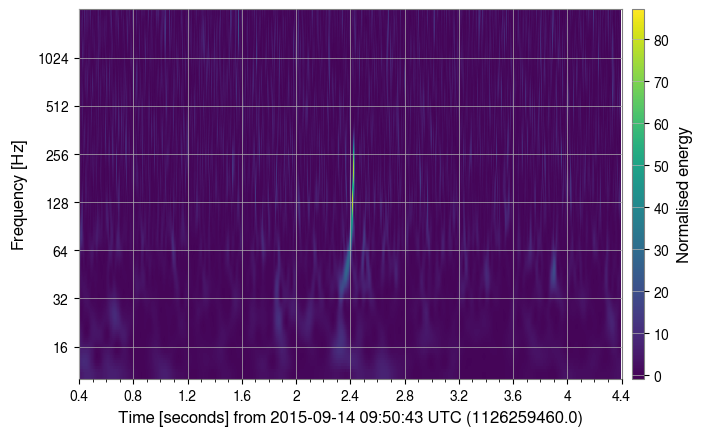

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-2,gps+2))
plot = hq.plot(figsize=(7, 5))
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

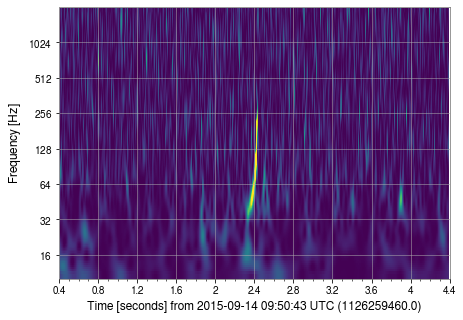

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-2,gps+2))
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5)
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024]);

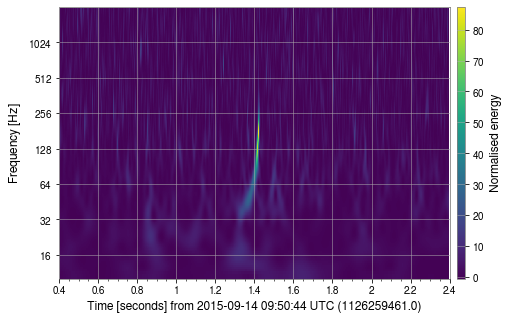

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-1,gps+1))
plot = hq.plot(figsize=(7, 5))
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

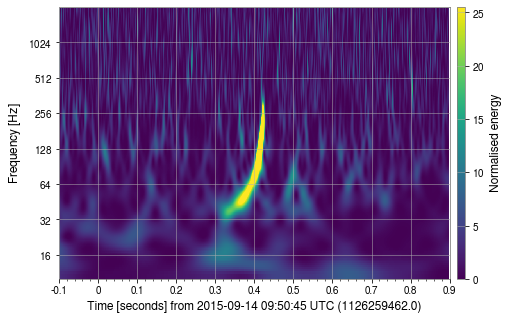

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-0.5,gps+0.5))
plot = hq.plot(figsize=(7, 5))
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

In [ ]:
event = 'GW150914-v3'
gps = event_gps(event)
seg_int = 32
sample_rate = 16384
segment = (np.ceil(gps)-seg_int/2, np.ceil(gps)+seg_int/2)
data = TimeSeries.fetch_open_data('L1', *segment, sample_rate=sample_rate, cache=True)

(10.0, 2048.0)

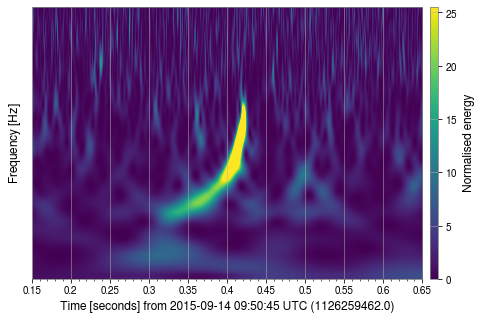

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), fres=2048*2, tres=0.5/(2048*2), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

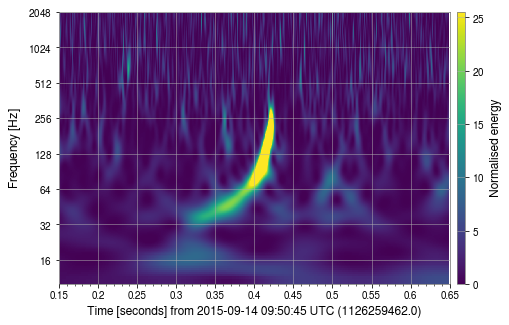

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25))
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5)
plt.yscale('log', base=2)
#plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

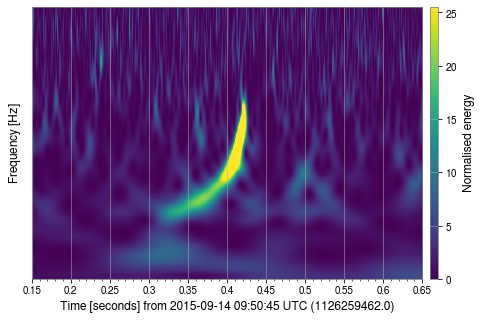

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

In [ ]:
event = 'GW150914-v3'
gps = event_gps(event)
seg_int = 32
sample_rate = 4096
segment = (np.ceil(gps)-seg_int/2, np.ceil(gps)+seg_int/2)
data = TimeSeries.fetch_open_data('L1', *segment, sample_rate=sample_rate, cache=True)

(10.0, 2048.0)

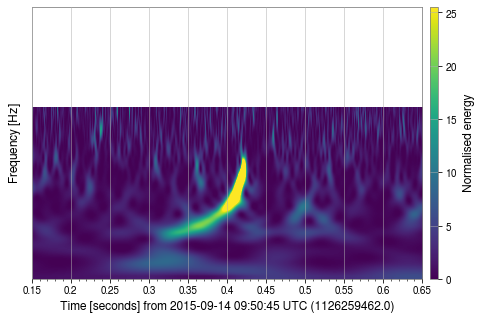

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), fres=2048*2, tres=0.5/(2048*2), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

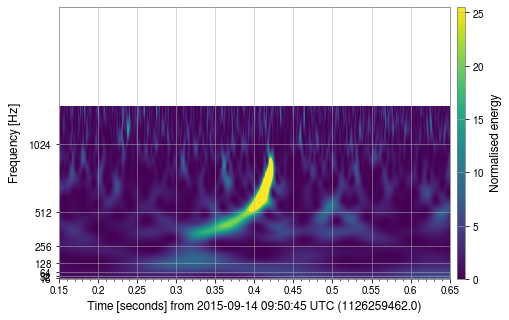

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
#plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

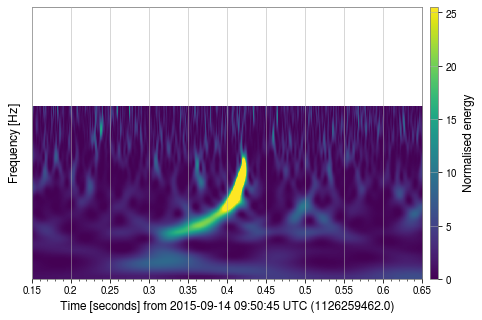

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

In [ ]:
from PIL import Image

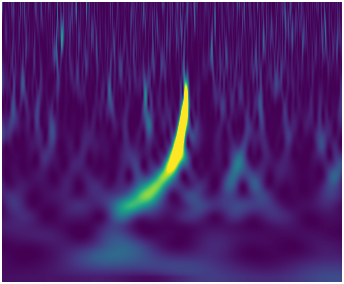

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), fres=2048*2, tres=0.5/(2048*2), logf=True)
plot = hq.plot(figsize=(17, 14), vmin=0, vmax=25.5, dpi=20)
plt.yticks([])
ax = plt.gca()
ax.axis('off')
plt.tight_layout()
plt.subplots_adjust(bottom=0.,left=0.,right=1.,top=1.001)

img = plt.savefig('test.png', dpi=10)
Image.open('test.png').convert('L').save('test.png')